In [61]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_healthcare = pd.read_excel("/Users/PKLAT/Desktop/Edureka/ML Practice/Healthcare_dataset.xlsx", sheet_name='Dataset')

In [3]:
df_healthcare.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [23]:
df_healthcare.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,0,0,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,1,0,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,1,1,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,1,1,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,1,1,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [7]:
df_healthcare.Race.unique()

array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
      dtype=object)

In [13]:
for i in df_healthcare.columns:
    print(i, ":", df_healthcare[i].unique())

Ptid : ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag : ['Persistent' 'Non-Persistent']
Gender : ['Male' 'Female']
Race : ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity : ['Not Hispanic' 'Hispanic' 'Unknown']
Region : ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket : ['>75' '55-65' '65-75' '<55']
Ntm_Speciality : ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'


In [19]:
df_healthcare.Dexa_During_Rx.unique()[0]

'N'

In [21]:
for i in df_healthcare.columns:
    if(df_healthcare[i].unique().shape[0] ==2):
        df_healthcare[i] = df_healthcare[i].map({df_healthcare[i].unique()[0]:0, df_healthcare[i].unique()[1]:1})  

In [22]:
for i in df_healthcare.columns:
    print(i, ":", df_healthcare[i].unique())

Ptid : ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag : [0 1]
Gender : [0 1]
Race : ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity : ['Not Hispanic' 'Hispanic' 'Unknown']
Region : ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket : ['>75' '55-65' '65-75' '<55']
Ntm_Speciality : ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY

In [24]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   int64 
 2   Gender                                                              3424 non-null   int64 
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [26]:
df_healthcare_final = pd.get_dummies(df_healthcare, columns=['Race','Ethnicity','Region','Age_Bucket','Ntm_Speciality','Ntm_Speciality_Bucket','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'])
                                                             
                                    

In [30]:
df_healthcare.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,0,1,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,0,OB/GYN/Others/PCP/Unknown,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,0,1,Caucasian,Not Hispanic,South,>75,Unknown,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,0,1,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,1,Endo/Onc/Uro,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,1,1,Caucasian,Not Hispanic,South,55-65,Unknown,0,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
3423,P3424,1,1,Caucasian,Not Hispanic,South,65-75,Unknown,0,OB/GYN/Others/PCP/Unknown,...,0,0,1,0,0,0,0,0,0,1


In [27]:
df_healthcare_final.tail()

,Ptid,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened
3419,P3420,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3420,P3421,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3421,P3422,0,1,1,0,0,7,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3422,P3423,1,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3423,P3424,1,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [28]:
df_healthcare.shape

(3424, 69)

In [29]:
df_healthcare_final.shape

(3424, 128)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y  = df_healthcare_final['Persistency_Flag']
x = df_healthcare_final.drop(['Persistency_Flag', 'Ptid'], axis =1)

In [33]:
x.shape

(3424, 126)

In [34]:
y.shape

(3424,)

In [39]:
df_healthcare_final['Persistency_Flag'].unique()

array([0, 1])

In [37]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size=0.3, random_state=19)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression(max_iter=1000)

In [42]:
logreg.fit(trainx, trainy)

LogisticRegression(max_iter=1000)

In [43]:
logreg.score(trainx, trainy)

0.8326377295492488

In [44]:
logpre = logreg.predict(testx)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(testy,logpre)

0.8093385214007782

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
dec = DecisionTreeClassifier()
rand = RandomForestClassifier()

In [50]:
dec.fit(trainx,trainy)

DecisionTreeClassifier()

In [51]:
rand.fit(trainx,trainy)

RandomForestClassifier()

In [52]:
decpre = dec.predict(testx)
randpre = rand.predict(testx)

In [54]:
accuracy_score(testy,randpre)

0.8171206225680934

In [55]:
accuracy_score(testy,decpre)

0.7334630350194552

In [58]:
df_healthcare_final.shape

(3424, 128)

In [57]:
for i in df_healthcare_final.columns:
    if(len(df_healthcare_final[i].unique()) == 1):
        df_healthcare_final.drop(i, axis=1, inplace = True)

In [59]:
df_corr = df_healthcare_final.corr()

In [63]:
df_healthcare_final.shape

(3424, 128)

In [64]:
df_corr.shape

(127, 127)

<AxesSubplot:>

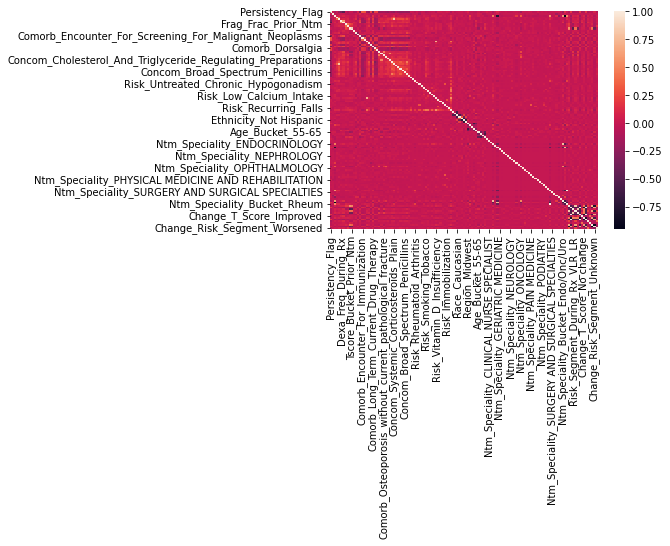

In [62]:
sns.heatmap(df_corr)

In [96]:
corr_col = []
for i in range(len(df_corr.index)):
    for j in range(i):
        if((df_corr.iloc[i,j])>0.75):
            corr_col.append(df_corr.columns[j])

In [98]:
corr_col

['Risk_Segment_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Ntm_Speciality_ENDOCRINOLOGY',
 'Ntm_Speciality_RHEUMATOLOGY',
 'Risk_Segment_During_Rx_HR_VHR',
 'Risk_Segment_During_Rx_VLR_LR',
 'Risk_Segment_During_Rx_Unknown',
 'Risk_Segment_During_Rx_Unknown',
 'Tscore_Bucket_During_Rx_Unknown']

In [99]:
len(corr_col)

9

In [100]:
df_healthcare_final2 = df_healthcare_final.drop(corr_col, axis=1)

In [101]:
 df_healthcare_final.shape

(3424, 128)

In [102]:
 df_healthcare_final2.shape

(3424, 120)

In [103]:
df_healthcare_final2.tail()

,Ptid,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Tscore_Bucket_Prior_Ntm,...,Tscore_Bucket_During_Rx_<=-2.5,Tscore_Bucket_During_Rx_>-2.5,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened
3419,P3420,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3420,P3421,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3421,P3422,0,1,1,0,7,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3422,P3423,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3423,P3424,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [104]:
y_cut = df_healthcare_final2['Persistency_Flag']
x_cut = df_healthcare_final2.drop(['Ptid','Persistency_Flag'], axis=1)

In [105]:
trainxcut, testxcut, trainycut, testycut = train_test_split(x_cut,y_cut, test_size=0.3, random_state=19)

In [118]:
logsi = LogisticRegression(max_iter=10000)
dectree = DecisionTreeClassifier()
randfore = RandomForestClassifier(n_estimators=200)

In [119]:
logsi.fit(trainxcut,trainycut)

LogisticRegression(max_iter=10000)

In [120]:
dectree.fit(trainxcut,trainycut)

DecisionTreeClassifier()

In [121]:
randfore.fit(trainxcut,trainycut)

RandomForestClassifier(n_estimators=200)

In [122]:
pred_logsi = logsi.predict(testxcut)

In [123]:
pred_dectree = dectree.predict(testxcut)

In [124]:
pred_randfore = randfore.predict(testxcut)

In [125]:
accuracy_score(testycut,pred_logsi)

0.8103112840466926

In [126]:
accuracy_score(testycut,pred_dectree)

0.7470817120622568

In [127]:
accuracy_score(testycut,pred_randfore)

0.8171206225680934